In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기

In [17]:
df = pd.read_csv('kaggle_survey_2022_responses.csv')
df_age = pd.read_csv("df_age.csv")
df_cloud_platform = pd.read_csv("df_cloud_platform.csv")
df_country = pd.read_csv("df_country.csv")
df_edu_platforms = pd.read_csv("df_edu_platforms.csv")
df_edu_products = pd.read_csv("df_edu_products.csv")
df_framework = pd.read_csv("df_framework.csv")
df_gender = pd.read_csv("df_gender.csv")
df_main_role = pd.read_csv("df_main_role.csv")

/var/folders/8p/0rn2lvdj485dhnwbsnpgnb380000gp/T/ipykernel_52777/4215102138.py:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_survey_2022_responses.csv')


In [18]:
df_list = [df_cloud_platform, df_country, df_edu_platforms, df_edu_products,
           df_framework, df_main_role] # df_age, df_gender는 정렬 안 함

In [19]:
for i in df_list:
    i.sort_values(i.columns[1], ascending = False, inplace = True) # 데이터 정렬
for i in df_list:
    i.set_index('Unnamed: 0', inplace = True) # 인덱스 변경

In [20]:
df_age.set_index('Unnamed: 0', inplace = True)
df_age.sort_index(inplace = True)
df_age

,What is your age (# years)?
Unnamed: 0,
18-21,4559
22-24,4283
25-29,4472
30-34,2972
35-39,2353
40-44,1927
45-49,1253
50-54,914
55-59,611


In [21]:
df_age.to_csv("df_age.csv")

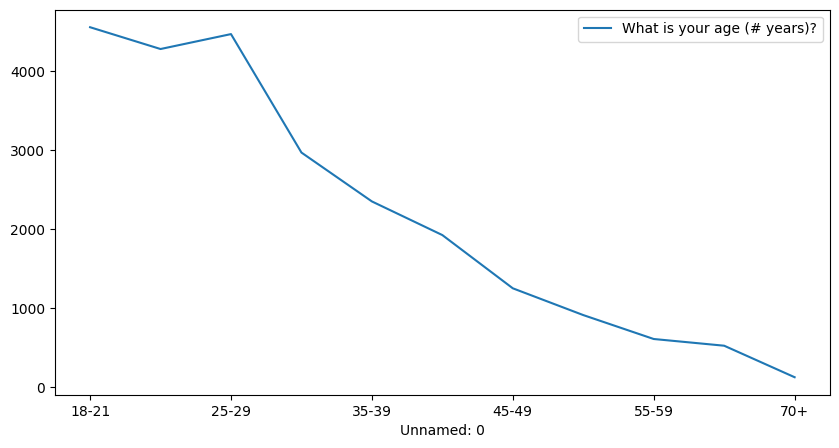

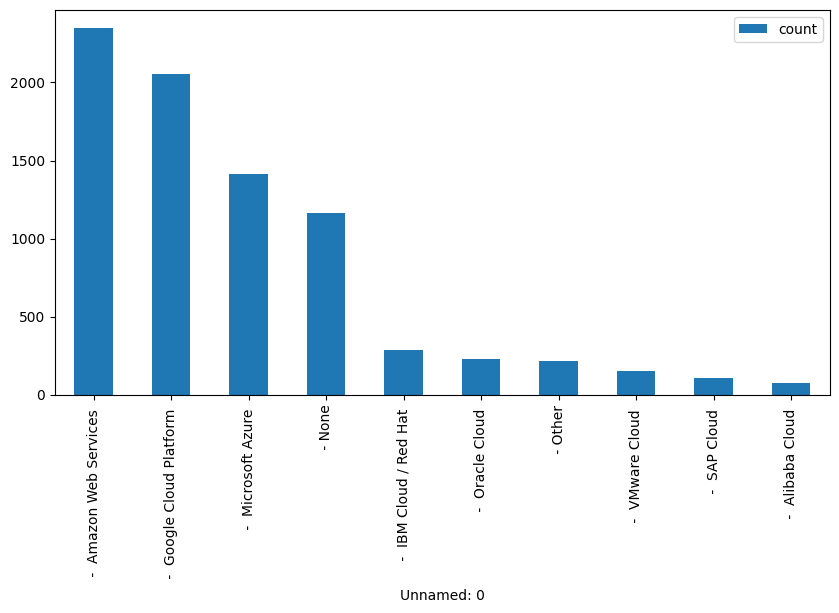

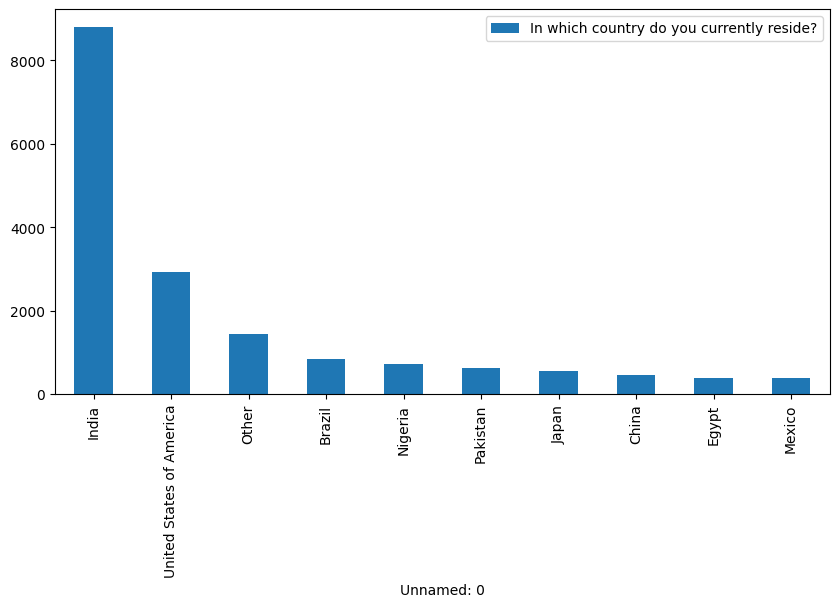

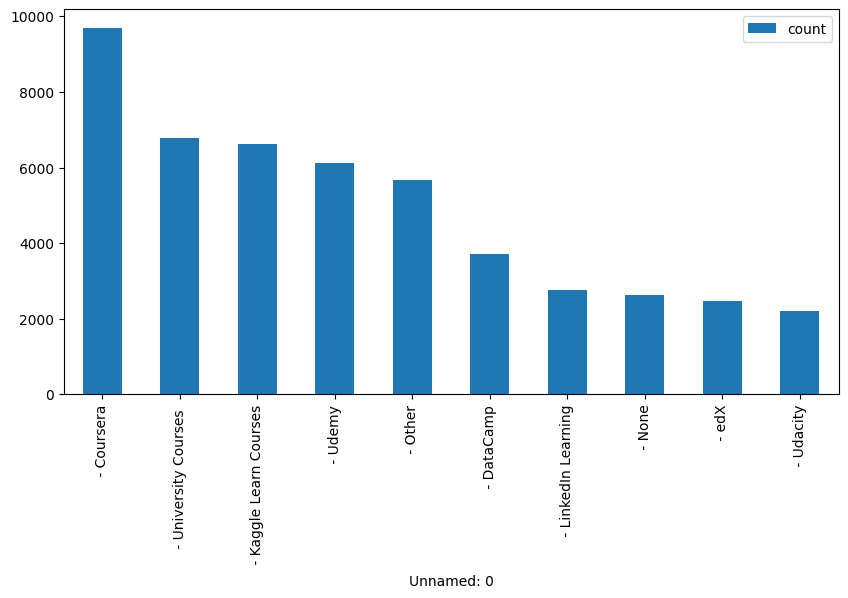

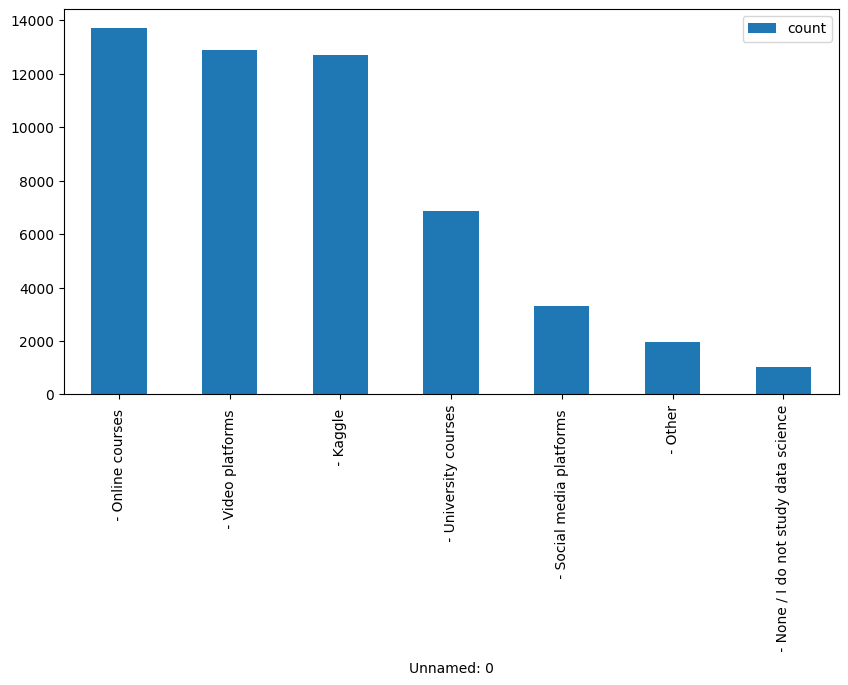

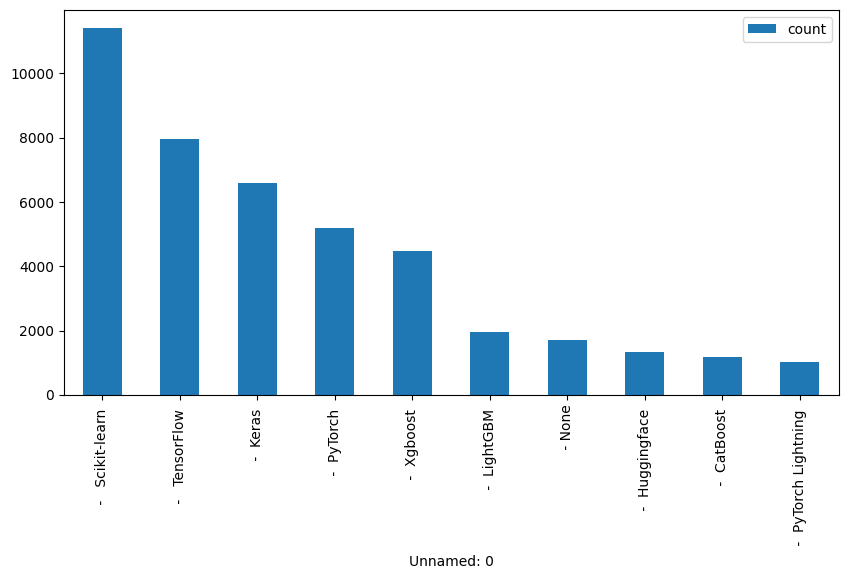

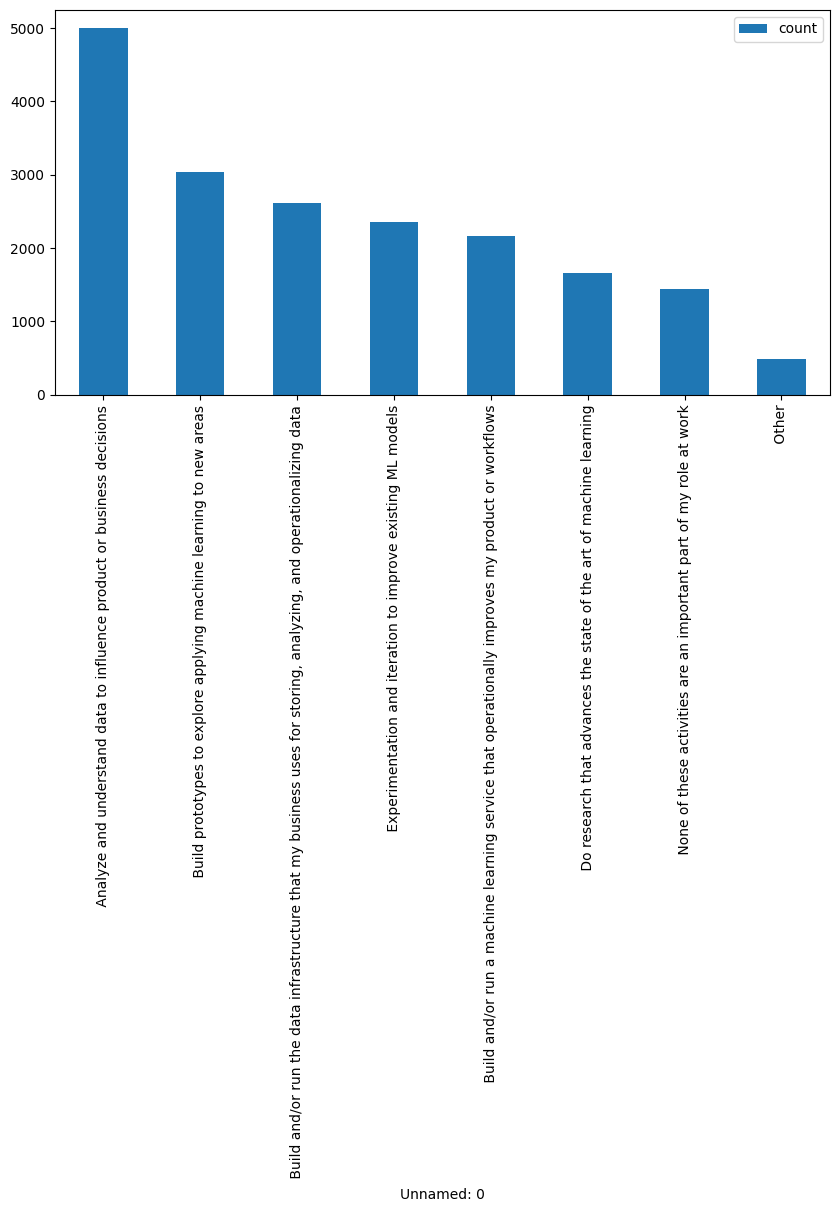

In [22]:
df_age.plot(figsize=(10,5))
plt.show()
for i in df_list:
    i.iloc[:10,:].plot(kind = "bar", figsize=(10,5))
    plt.show()

In [23]:
df_gender

,Unnamed: 0,What is your gender? - Selected Choice
0,Man,18266
1,Woman,5286
2,Prefer not to say,334
3,Nonbinary,78
4,Prefer to self-describe,33


## index 2~4 묶어서 etc로 변경해주기

In [24]:
df_gender[2:]
df_gender[2:].sum()[1]
df_gender.loc[2] = ['etc', df_gender[2:].sum()[1]]
df_gender = df_gender.drop(index = {df_gender.index[3:][i] for i in range(len(df_gender.index[3:]))}, axis=0)
df_gender.set_index('Unnamed: 0', inplace = True)
df_gender

,What is your gender? - Selected Choice
Unnamed: 0,
Man,18266
Woman,5286
etc,445


# kaggle 사용자 성별 pie 차트로 보기

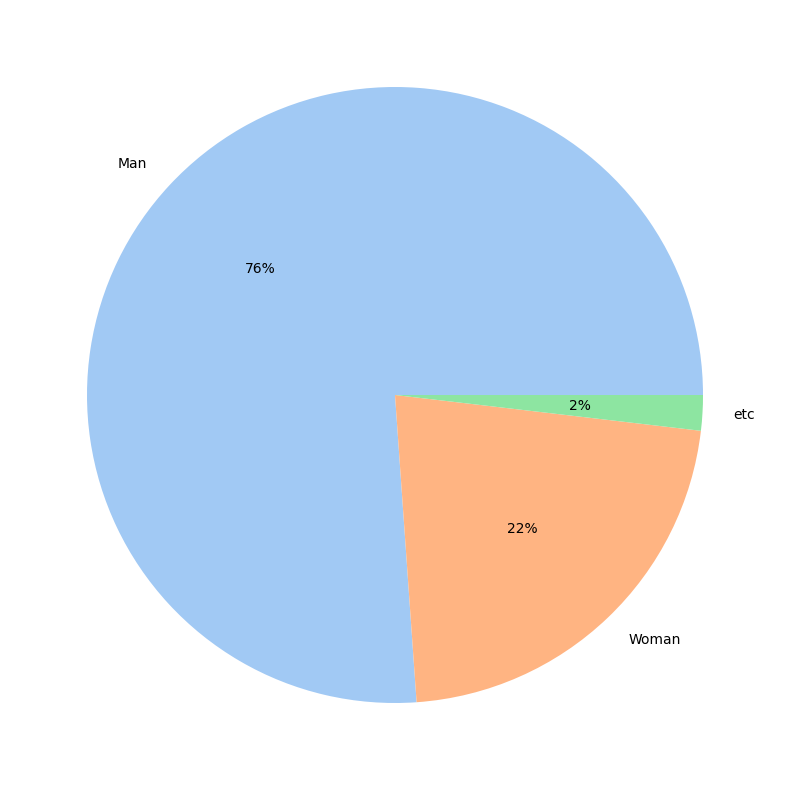

In [25]:
# define data
data = []
for i in range(len(df_gender.iloc[:,0].values)):
    data.append(df_gender.iloc[:,0].values[i])
labels = list(df_gender.index)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(20,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()